<a href="https://colab.research.google.com/github/jiwoopark-ant/machine_learning/blob/master/set06_10_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 06 유형(DataSet_06.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 4,323 Rows, 19 Columns, UTF-8 인코딩

# 주택 관련 정보를 바탕으로 주택 가격을 예측해 보고자 한다.
# 다음은 확보한 주택 관련 데이터로 총 19개 컬럼으로 구성되어
# 있다.

# 컬 럼 / 정 의 / Type
# id / 매물 번호 / Double
# date / 날짜 / String
# price / 거래 가격 / Double
# bedrooms / 방 개수 / Double
# bathrooms / 화장실 개수 (화장실은 있으나 샤워기 없는 경우 0.5로 처리) / Double
# sqft_living / 건축물 면적 / Double
# sqft_lot / 대지 면적 / Double
# floors / 건축물의 층수 / Double
# waterfront / 강변 조망 가능 여부 (0 / 1) / Double
# view / 경관 (나쁨에서 좋음으로 0 ~ 4로 표시) / Double
# condition / 관리 상태 (나쁨에서 좋음으로 1 ~ 5로 표시) / Double
# grade / 등급 (낮음에서 높음으로 1 ~ 13으로 표시) / Double
# sqft_above / 지상 면적 / Double
# sqft_basement / 지하실 면적 / Double
# yr_built / 건축 연도 / Double
# yr_renovated / 개축 연도 / Double
# zipcode / 우편번호 / Double
# sqft_living15 / 15개의 인근 주택의 평균 건물 면적 / Double
# sqft_lot15 / 15개의 인근 주택의 평균 대지 면적 / Double
# =============================================================================
# =============================================================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data6=pd.read_csv('Dataset_06.csv')
data6.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2597000006,20150309T000000,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,98155,1710,8748
1,8813400345,20150414T000000,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,98105,1620,3706
2,226059106,20150102T000000,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,98072,2450,47178
3,8645500270,20141028T000000,246000.0,4,1.75,1720,7455,1.0,0,0,4,7,1020,700,1963,0,98058,1720,7700
4,7010700550,20141114T000000,595000.0,3,2.50,2030,5100,2.0,0,0,3,7,2030,0,2008,0,98199,1790,4380


In [3]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4323 non-null   int64  
 1   date           4323 non-null   object 
 2   price          4323 non-null   float64
 3   bedrooms       4323 non-null   int64  
 4   bathrooms      4323 non-null   float64
 5   sqft_living    4323 non-null   int64  
 6   sqft_lot       4323 non-null   int64  
 7   floors         4323 non-null   float64
 8   waterfront     4323 non-null   int64  
 9   view           4323 non-null   int64  
 10  condition      4323 non-null   int64  
 11  grade          4323 non-null   int64  
 12  sqft_above     4323 non-null   int64  
 13  sqft_basement  4323 non-null   int64  
 14  yr_built       4323 non-null   int64  
 15  yr_renovated   4323 non-null   int64  
 16  zipcode        4323 non-null   int64  
 17  sqft_living15  4323 non-null   int64  
 18  sqft_lot

In [ ]:
# =============================================================================
# 1.강변 조망이 가능한지 여부(waterfront)에 따라 평균 주택 가격을 계산하고 조망이
# 가능한 경우와 그렇지 않은 경우의 평균 가격 차이의 절대값을 구하시오. 답은
# 소수점 이하는 버리고 정수부만 기술하시오. (답안 예시) 1234567
# =============================================================================

In [4]:
question6_1_1=data6[data6.waterfront == 1]['price'].mean()
question6_1_0=data6[data6.waterfront == 0]['price'].mean()

int(abs(question6_1_1-question6_1_0))  #즉 강변부가 보이는곳이 안보이는 곳보다 값이 비싸다

1167272

In [5]:
data6.waterfront.value_counts()

0    4290
1      33
Name: waterfront, dtype: int64

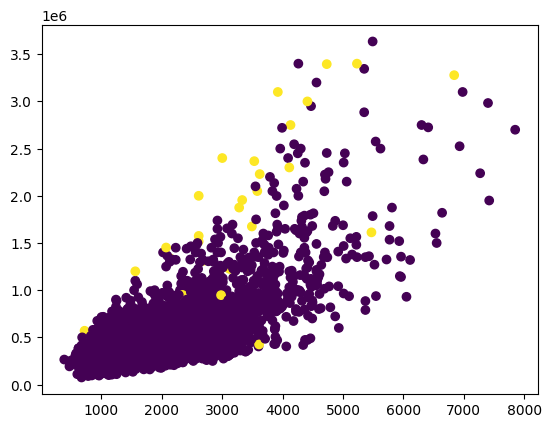

In [6]:
plt.scatter(x=data6.sqft_living,y=data6.price,c=data6.waterfront+1)

In [ ]:
# =============================================================================
# 2.price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, yr_built 등 7개의 변수 간의
# 상관분석을 수행하고 price와의 상관계수의 절대값이 가장 큰 변수와 가장 작은
# 변수를 차례로 기술하시오. (답안 예시) view, zipcode
#
# =============================================================================

In [7]:
q6_2_var_list=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

In [8]:
data6[q6_2_var_list].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
price,1.000000,0.279824,0.534277,0.709157,0.106341,0.270423,0.059895
bedrooms,0.279824,1.000000,0.468611,0.517502,0.017658,0.151279,0.137440
bathrooms,0.534277,0.468611,1.000000,0.751835,0.105676,0.495845,0.509019
sqft_living,0.709157,0.517502,0.751835,1.000000,0.180408,0.368670,0.323522
sqft_lot,0.106341,0.017658,0.105676,0.180408,1.000000,0.032762,0.062490
floors,0.270423,0.151279,0.495845,0.368670,0.032762,1.000000,0.505070
yr_built,0.059895,0.137440,0.509019,0.323522,0.062490,0.505070,1.000000


In [9]:
q6_2=data6[q6_2_var_list].corr()['price'].drop('price').abs()
q6_2

bedrooms       0.279824
bathrooms      0.534277
sqft_living    0.709157
sqft_lot       0.106341
floors         0.270423
yr_built       0.059895
Name: price, dtype: float64

In [10]:
q6_2.idxmax(),q6_2.idxmin() #상관성 높은 부분 걸러내기 위함

('sqft_living', 'yr_built')

In [ ]:
# =============================================================================
# 3. id, date, 그리고 zipcode를 제외한 모든 변수를 독립변수로, price를 종속변수로 하여
# 회귀분석을 수행하시오. 통계적 유의성을 갖지 못하는 독립변수를 제거하면 회귀
# 모형에 남는 변수는 모두
# 몇 개인가? 이 때 음의 회귀계수를 가지는 변수는 몇 개인가? (답안 예시) 5, 3
# =============================================================================

# =============================================================================
# (참고)
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from statsmodels.formula.api import ols
# =============================================================================

In [12]:
q6_3_var_list=data6.columns.drop(['id','date','zipcode','price'])
q6_3_var_list

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [13]:
from statsmodels.formula.api import ols

In [ ]:
#lm2=ols('식',data).fit

#-식: 'y~x1+x2+x3-1'
#-1: 상수항 미포함
#문자열 변수들은 자동으로 더미 변수로 변

In [14]:
'price~'+'x1+x2'

'price~x1+x2'

In [15]:
'+'.join(q6_3_var_list)

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [16]:
'price~' +  '+'.join(q6_3_var_list)

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [17]:
form1='price~' +  '+'.join(q6_3_var_list)
form1

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [18]:
lm2=ols(form1,data6).fit()

In [19]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     656.0
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:22:27   Log-Likelihood:                -58960.
No. Observations:                4323   AIC:                         1.180e+05
Df Residuals:                    4308   BIC:                         1.180e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.302e+06   2.95e+05     21.401      0.000    5.73e+06    6.88e+06
bedrooms        -2.5e+04   3680.510     -6.791      0.000   -3.22e+04   -1.78e+04
bathrooms      5.179e+04   7163.408      7.230      0.000    3.77e+04    6.58e+04
sqft_living      92.3080      5.074     18.192      0.000      82.360     102.256
sqft_lot          0.0054      0.093      0.059      0.953      -0.176       0.187
floors         3.748e+04   8141.392      4.604      0.000    2.15e+04    5.34e+04
waterfront     6.277e+05   3.91e+04     16.064      0.000    5.51e+05    7.04e+05
view            4.04e+04   4797.344      8.421      0.000     3.1e+04    4.98e+04
condition      1.571e+04   5317.387      2.954      0.003    5280.918    2.61e+04
grade          1.306e+05   4700.604     27.789      0.000    1.21e+05     1.4e+05
sqft_above       33.7358      4.981      6.773      0.000      23.971      43.501
sqft_basement    58.5723      5.840     10.030      0.000      47.123      70.021
yr_built      -3666.8957    150.805    -24.316      0.000   -3962.551   -3371.241
yr_renovated     17.7032      8.265      2.142      0.032       1.499      33.908
sqft_living15    23.0114      7.561      3.044      0.002       8.188      37.834
sqft_lot15       -0.2323      0.142     -1.637      0.102      -0.511       0.046
==============================================================================
Omnibus:                     2170.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38362.875
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                     1.94e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.29e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 문제 07 유형(DataSet_07.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 400 Rows, 9 Columns, UTF-8 인코딩
#
# 대학원 진학을 위하여 어떤 항목이 중요하게 영향을 미치는지
# 아래 데이터로 분석하고자 한다.

# 컬 럼 / 정 의 / Type
# Serial_No / 구분자 번호 / Double
# GRE / GRE 시험 성적 / Double
# TOEFL / TOEFL 시험 성적 / Double
# University_Rating / 대학 평가 그룹 (1 ~ 5) / Double
# SOP / 자기 소개서 점수 (1 ~ 5) / Double
# LOR / 추천서 점수 (1 ~ 5) / Double
# CGPA / 학부 평량 평점 (10점 만점 환산 점수) / Double
# Research / 연구 참여 경험 여부 (0 / 1) / Double
# Chance_of_Admit / 합격 가능성 / Double
# =============================================================================
# =============================================================================

# =============================================================================
# (참고)
# #1
# import pandas as pd
# #2
# import scipy.stats as stats
# #3
# from sklearn.linear_model import LogisticRegression
# Solver = ‘liblinear’, random_state = 12
# =============================================================================

In [ ]:
# =============================================================================
# 1. 합격 가능성에 GRE, TOEFL, CGPA 점수 가운데 가장 영향이 큰 것이 어떤 점수인지
# 알아 보기 위해서 상관 분석을 수행한다.
# - 피어슨(Pearson) 상관계수 값을 구한다.
# - Chance_of_Admit와의 가장 큰 상관계수 값을 가지는 항목의 상관계수를 소수점 넷째
# 자리에서 반올림하여 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [ ]:
# =============================================================================
# 2.GRE 점수의 평균 이상을 받은 그룹과 평균 미만을 받은 그룹의 CGPA 평균은 차이가
# 있는지
# 검정을 하고자 한다.
# - 적절한 검정 방법을 선택하고 양측 검정을 수행하시오 (등분산으로 가정)
# - 검정 결과, 검정통계량의 추정치를 소수점 셋째 자리에서 반올림하여 소수점 두 자리까지
# 기술하시오.
# (답안 예시) 1.23
# =============================================================================

In [ ]:
# =============================================================================
# 3.Chance_of_Admit 확률이 0.5를 초과하면 합격으로, 이하이면 불합격으로 구분하고
# 로지스틱 회귀분석을 수행하시오.
# - 원데이터만 사용하고, 원데이터 가운데 Serial_No와 Label은 모형에서 제외
# - 각 설정값은 다음과 같이 지정하고, 언급되지 않은 사항은 기본 설정값을 사용하시오
# Seed : 123
# - 로지스틱 회귀분석 수행 결과에서 로지스틱 회귀계수의 절대값이 가장 큰 변수와 그 값을
# 기술하시오.
# (로지스틱 회귀계수는 반올림하여 소수점 둘째 자리까지 / Intercept는 제외)
# (답안 예시) abc, 0.12
# =============================================================================

# 문제 08 유형(DataSet_08.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 50 Rows, 5 Columns, UTF-8 인코딩
#
# 스타트업 기업들의 수익성에 대한 분석을 하기 위하여
# 아래와 같은 데이터를 입수하였다
#
#
# 컬 럼 / 정 의 / Type
# RandD_Spend / 연구개발비 지출 / Double
# Administration / 운영관리비 지출 / Double
# Marketing_Spend / 마케팅비 지출 / Double
# State / 본사 위치 / String
# Profit / 이익 / Double
# =============================================================================
# =============================================================================

# =============================================================================
# (참고)
# #1
# import pandas as pd
# import numpy as np
# #3
# from sklearn.linear_model import LinearRegression
# =============================================================================

In [ ]:
# =============================================================================
# 1.각 주(State)별 데이터 구성비를 소수점 둘째 자리까지 구하고, 알파벳 순으로
# 기술하시오(주 이름 기준).
# (답안 예시) 0.12, 0.34, 0.54
# =============================================================================

In [ ]:
# =============================================================================
# 2.주별 이익의 평균을 구하고, 평균 이익이 가장 큰 주와 작은 주의 차이를 구하시오.
# 차이값은 소수점 이하는 버리고 정수부분만 기술하시오. (답안 예시) 1234
# =============================================================================

In [ ]:
# =============================================================================
# 3.독립변수로 RandD_Spend, Administration, Marketing_Spend를 사용하여 Profit을 주별로
# 예측하는 회귀 모형을 만들고, 이 회귀모형을 사용하여 학습오차를 산출하시오.
# - 주별로 계산된 학습오차 중 MAPE 기준으로 가장 낮은 오차를 보이는 주는 어느
# 주이고 그 값은 무엇인가? (반올림하여 소수점 둘째 자리까지 기술하시오)
# - (MAPE = Σ ( | y - y ̂ | / y ) * 100/n )
# (답안 예시) ABC, 1.56
# =============================================================================

# 문제 09 유형(DataSet_09.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 2000 Rows, 16 Columns, UTF-8 인코딩
#
# 항공사에서 고객만족도 조사를 하고 서비스 개선에 활용하고자
# 아래와 같은 데이터를 준비하였다.
#
# 컬 럼 / 정 의 / Type
# satisfaction / 서비스 만족 여부 / String
# Gender / 성별 / String
# Age / 나이 / Double
# Customer_Type / 고객 타입 / String
# Class / 탑승 좌석 등급 / String
# Flight_Distance / 비행 거리 / Double
# Seat_comfort / 좌석 안락도 점수 / Double
# Food_and_Drink / 식사와 음료 점수 / Double
# Inflight_wifi_service / 기내 와이파이 서비스 점수 / Double
# Inflight_entertainment / 기내 엔터테인먼트 서비스 점수 / Double
# Onboard_service / 탑승 서비스 점수 / Double
# Leg_room_service / 다리 공간 점수 / Double
# Baggage_handling / 수하물 취급 점수 / Double
# Cleanliness / 청결도 점수 / Double
# Departure_Daly_in_Minutes / 출발 지연 (분) / Double
# Arrival_Delay_in_Minutes / 도착 지연 (분) / Double
# =============================================================================
# =============================================================================

# =============================================================================
# (참고)
# #1
# import pandas as pd
# import numpy as np
# #2
# import scipy.stats as stats
# #3
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
#
# =============================================================================

In [ ]:
# =============================================================================
# 1.데이터 타입을 위 표에 정의된 타입으로 전처리를 한 후, 데이터 파일 내에 결측값은
# 총 몇 개인가? (답안 예시) 1
# =============================================================================

In [ ]:
# =============================================================================
# 2.다음에 제시된 데이터 처리를 하고 카이제곱 독립성 검정을 수행하시오.
# - 결측값이 있다면 해당 행을 제거하시오.
# - 나이는 20 이하이면 10, 30 이하이면 20, 40 이하이면 30, 50 이하이면 40, 60 이하이면 50,
# 60 초과는 60으로 변환하여 Age_gr으로 파생변수를 생성하시오.
# - Age_gr, Gender, Customer_Type, Class 변수가 satisfaction에 영향이 있는지 카이제곱
# 독립성 검정을 수행하시오.
# - 연관성이 있는 것으로 파악된 변수의 검정통계량 추정치를 정수 부분만 기술하시오.
# (답안 예시) 123
# =============================================================================

In [ ]:
#%%

# =============================================================================
# 3.고객 만족도를 라벨로 하여 다음과 같이 로지스틱 회귀분석을 수행하시오.
# - 결측치가 포함된 행은 제거
# - 데이터를 7대 3으로 분리 (Seed = 123)
# - 아래의 11개 변수를 Feature로 사용
# Flight_Distance, Seat_comfort, Food_and_drink, Inflight_wifi_service,
# Inflight_entertainment,Onboard_service, Leg_room_service, Baggage_handling,
# Cleanliness, Departure_Delay_in_Minutes, Arrival_Delay_in_Minutes
#
# - Seed = 123, 이외의 항목은 모두 Default 사용
# - 예측 정확도를 측정하고 dissatisfied의 f1 score를 소수점 넷째 자리에서 반올림하여
# 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================















#%%

# =============================================================================
# =============================================================================
# # 문제 10 유형(DataSet_10.csv 이용)
#
# 구분자 : comma(“,”), 1538 Rows, 6 Columns, UTF-8 인코딩

# 중고 자동차 가격에 대한 분석을 위하여 아래와 같은 데이터를
# 확보하였다.

# 컬 럼 / 정 의 / Type
# model / 모델명 / String
# engine_power / 엔진 파워 / Double
# age_in_days / 운행 일수 / Double
# km / 운행 거리 / Double
# previous_owners / 이전 소유자 수 / Double
# price / 중고차 가격 / Double
# =============================================================================
# =============================================================================

# =============================================================================
# (참고)
# #1
# import pandas as pd
# import numpy as np
# #2
# import scipy.stats as ststs
# #3
# from sklearn.linear_model import LinearRegression
# =============================================================================


#%%

# =============================================================================
# 1.이전 소유자 수가 한 명이고 엔진 파워가 51인 차에 대해 모델별 하루 평균 운행
# 거리를 산출하였을 때 가장 낮은 값을 가진 모델이 가장 큰 값을 가진 모델에 대한
# 비율은 얼마인가? 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지
# 기술하시오.
# (모델별 평균 → 일평균 → 최대최소 비율 계산) (답안 예시) 0.12
# =============================================================================













#%%

# =============================================================================
# 2.운행 일수에 대한 운행 거리를 산출하고, 위 1번 문제에서 가장 큰 값을 가지고 있던
# 모델과 가장 낮은 값을 가지고 있던 모델 간의 운행 일수 대비 운행거리 평균이 다른지
# 적절한 통계 검정을 수행하고 p-value를 소수점 세자리 이하는 버리고 소수점
# 두자리까지 기술하고 기각 여부를 Y / N로 답하시오. (등분산을 가정하고 equal_var =
# True / var.equal = T로 분석을 실행하시오.)
# (답안 예시) 0.23, Y
# =============================================================================










#%%

# =============================================================================
# 3.독립변수로 engine_power, age_in_days, km를 사용하고 종속변수로 price를 사용하여
# 모델별 선형회귀분석을 수행하고, 산출된 모형을 사용하여 다음과 같은 조건의
# 중고차에 대한 가격을 예측하고 예측된 가격을 정수부만 기술하시오.
# - model : pop / engine_power : 51 / age_in_days : 400 / km : 9500 / previous_owners : 2

# (답안 예시) 12345
# =============================================================================
# model = pop이고 이전 소유자수가 2명인 데이터만을 이용하여 회귀모델을 생성하시오.